In [ ]:
# AUTONOMOUS VEHICLE SENSOR DATA ANALYSIS

In [1]:
# from google.colab import files
# files.upload()


In [ ]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#Uploading dataset from kaggle
!kaggle datasets download -d claygt6/kitti-mini -p /content/


Dataset URL: https://www.kaggle.com/datasets/claygt6/kitti-mini
License(s): unknown
kitti-mini.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/kitti-mini.zip -d /content/kitti-mini


Archive:  /content/kitti-mini.zip
replace /content/kitti-mini/ImageSets/test.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/kitti-mini/ImageSets/test.txt  
  inflating: /content/kitti-mini/ImageSets/train.txt  
  inflating: /content/kitti-mini/ImageSets/trainval.txt  
  inflating: /content/kitti-mini/ImageSets/val.txt  
  inflating: /content/kitti-mini/kitti_dbinfos_train.pkl  
  inflating: /content/kitti-mini/kitti_gt_database/0_Pedestrian_0.bin  
  inflating: /content/kitti-mini/kitti_gt_database/10_Car_0.bin  
  inflating: /content/kitti-mini/kitti_gt_database/11_Car_0.bin  
  inflating: /content/kitti-mini/kitti_gt_database/11_Tram_2.bin  
  inflating: /content/kitti-mini/kitti_gt_database/11_Van_1.bin  
  inflating: /content/kitti-mini/kitti_gt_database/1_Car_0.bin  
  inflating: /content/kitti-mini/kitti_gt_database/2_Car_0.bin  
  inflating: /content/kitti-mini/kitti_gt_database/2_Car_1.bin  
  inflating: /content/kitti-mini/kitti_gt_database/2_Car_2.bin  
  

In [ ]:
import os
dataset_path = "/content/kitti-mini"
# Checking
print("Dataset files:", os .listdir(dataset_path))


Dataset files: ['kitti_gt_database', 'kitti_infos_trainval.pkl', 'kitti_infos_train.pkl', 'kitti_infos_val.pkl', 'kitti_infos_test.pkl', 'kitti_dbinfos_train.pkl', 'ImageSets', 'testing', 'training']


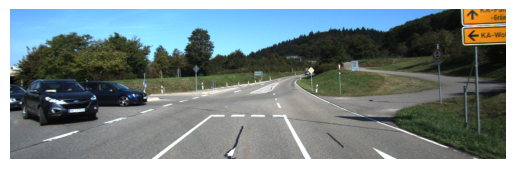

In [ ]:
#View Dataset Structure Using Pandas
import cv2
import matplotlib.pyplot as plt

# Path to a sample image from testing data
image_path = "/content/kitti-mini/testing/image_2/000001.png"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting from OpenCV BGR to RGB

plt.imshow(img)
plt.axis("off")
plt.show()



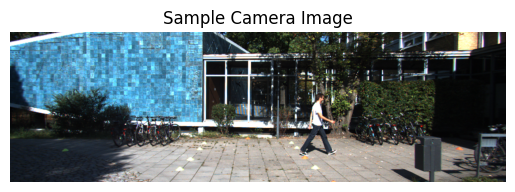

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = "/content/kitti-mini/training/image_2/000000.png"

# Load and display the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Sample Camera Image")
plt.axis("off")
plt.show()


In [ ]:
import numpy as np

# Path to a sample LIDAR file
lidar_path = "/content/kitti-mini/training/velodyne/000000.bin"

# Load LIDAR data (Each point has x, y, z, reflectance)
lidar_data = np.fromfile(lidar_path, dtype=np.float32).reshape(-1, 4)

print("LIDAR Data Shape:", lidar_data.shape)  # (N, 4) where N = number of points
print("First 5 points:\n", lidar_data[:5])

LIDAR Data Shape: (115384, 4)
First 5 points:
 [[1.8324e+01 4.9000e-02 8.2900e-01 0.0000e+00]
 [1.8344e+01 1.0600e-01 8.2900e-01 0.0000e+00]
 [5.1299e+01 5.0500e-01 1.9440e+00 0.0000e+00]
 [1.8317e+01 2.2100e-01 8.2900e-01 0.0000e+00]
 [1.8352e+01 2.5100e-01 8.3000e-01 9.0000e-02]]


In [ ]:
import pandas as pd

#Path to the label file
label_path = "/content/kitti-mini/training/label_2/000000.txt"

#Read the label file
labels = pd.read_csv(label_path, sep=" ", header=None)

#Display first few object labels
print("Labels:\n", labels.head())


Labels:
            0    1   2    3      4      5       6       7     8     9    10  \
0  Pedestrian  0.0   0 -0.2  712.4  143.0  810.73  307.92  1.89  0.48  1.2   

     11    12    13    14  
0  1.84  1.47  8.41  0.01  


Original LIDAR Points: 115384
Filtered LIDAR Points: 100159
Original Labels: 1
Filtered Labels: 1


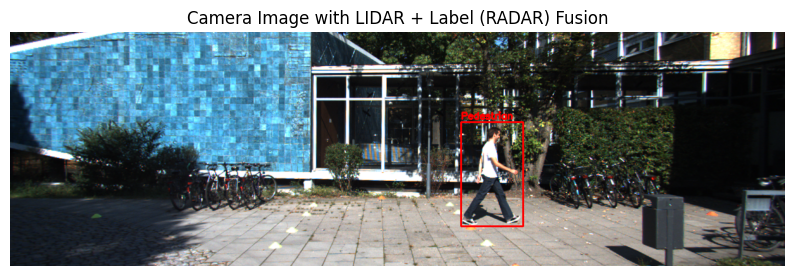

Sensor Fusion Completed Successfully!


In [ ]:
#Sensor Fusion & Data Cleaning
#Combine LIDAR, RADAR (simulated from labels), and Camera sensor data
#Filter out noisy sensor readings

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt


image_path = "/content/kitti-mini/training/image_2/000000.png"
lidar_path = "/content/kitti-mini/training/velodyne/000000.bin"
label_path = "/content/kitti-mini/training/label_2/000000.txt"

#Load Camera Image
camera_image = cv2.imread(image_path)
camera_image = cv2.cvtColor(camera_image, cv2.COLOR_BGR2RGB)

#Load LIDAR Data (Each point is x, y, z, reflectance)
lidar_data = np.fromfile(lidar_path, dtype=np.float32).reshape(-1, 4)

#Load Labels (Simulating RADAR metadata)
labels = pd.read_csv(label_path, sep=" ", header=None)
labels.columns = [
    'Type', 'Truncated', 'Occluded', 'Alpha',
    'BBox_xmin', 'BBox_ymin', 'BBox_xmax', 'BBox_ymax',
    '3D_Dim_h', '3D_Dim_w', '3D_Dim_l',
    '3D_Loc_x', '3D_Loc_y', '3D_Loc_z',
    'Rotation_y'
]

#Data Cleaning

#Remove noisy LIDAR points based on reflectance value
reflectance_threshold = 0.1  # Keep points with reflectance > 0.1
lidar_filtered = lidar_data[lidar_data[:, 3] > reflectance_threshold]

print(f"Original LIDAR Points: {lidar_data.shape[0]}")
print(f"Filtered LIDAR Points: {lidar_filtered.shape[0]}")

#Remove label entries with unknown objects
valid_labels = labels[labels['Type'] != 'DontCare']

print(f"Original Labels: {labels.shape[0]}")
print(f"Filtered Labels: {valid_labels.shape[0]}")

#Visualization (Overlay Bounding Boxes on Camera Image)

fused_image = camera_image.copy()

for _, row in valid_labels.iterrows():
    x_min, y_min, x_max, y_max = int(row['BBox_xmin']), int(row['BBox_ymin']), int(row['BBox_xmax']), int(row['BBox_ymax'])
    object_type = row['Type']


    cv2.rectangle(fused_image, (x_min, y_min), (x_max, y_max), (255,0,0), 2)

    # Put label
    cv2.putText(fused_image, object_type, (x_min, y_min-5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

#Show Fused Image
plt.figure(figsize=(10,8))
plt.imshow(fused_image)
plt.title("Camera Image with LIDAR + Label (RADAR) Fusion")
plt.axis('off')
plt.show()

#Summary
print("Sensor Fusion Completed Successfully!")


In [ ]:
#NumPy & Pandas Operations
# Sample response times of object detection models (seconds)
import numpy as np
import pandas as pd

# Simulating a scenario where an object detection system records detection and response times

# Generating some random detection times in seconds
np.random.seed(42)  # For reproducibility
num_objects = 10  # Number of detected objects

detection_times = pd.to_datetime(np.random.randint(1609459200, 1612137600, num_objects), unit='s')

# Simulating system response times with some noise (adding a random response delay between 0.1 to 2 seconds)
response_times = detection_times + pd.to_timedelta(np.random.uniform(0.1, 2.0, num_objects), unit='s')

# Creating a DataFrame
data = pd.DataFrame({
    'Object_ID': [f'Object_{i+1}' for i in range(num_objects)],
    'Detection_Time': detection_times,
    'Response_Time': response_times
})

# Calculate the response time for each detection
data['Response_Time_Delta'] = (data['Response_Time'] - data['Detection_Time']).dt.total_seconds()

# Calculate sample statistics (mean, median, etc.)
mean_response_time = data['Response_Time_Delta'].mean()
median_response_time = data['Response_Time_Delta'].median()
std_response_time = data['Response_Time_Delta'].std()

# Print results
print("Sample Response Time (in seconds):")
print(data[['Object_ID', 'Detection_Time', 'Response_Time', 'Response_Time_Delta']])
print(f"\nMean Response Time: {mean_response_time:.2f} seconds")
print(f"Median Response Time: {median_response_time:.2f} seconds")
print(f"Standard Deviation of Response Time: {std_response_time:.2f} seconds")


Sample Response Time (in seconds):
   Object_ID      Detection_Time                 Response_Time  \
0   Object_1 2021-01-26 16:25:10 2021-01-26 16:25:11.745734677   
1   Object_2 2021-01-26 19:11:24 2021-01-26 19:11:25.242118522   
2   Object_3 2021-01-28 06:32:10 2021-01-28 06:32:11.445337898   
3   Object_4 2021-01-20 14:12:23 2021-01-20 14:12:23.139110539   
4   Object_5 2021-01-02 06:37:48 2021-01-02 06:37:49.942828719   
5   Object_6 2021-01-09 11:23:00 2021-01-09 11:23:01.681641018   
6   Object_7 2021-01-26 20:41:29 2021-01-26 20:41:29.503444310   
7   Object_8 2021-01-19 04:06:46 2021-01-19 04:06:46.445467438   
8   Object_9 2021-01-24 04:27:54 2021-01-24 04:27:54.448468569   
9  Object_10 2021-01-14 03:34:34 2021-01-14 03:34:34.678060262   

   Response_Time_Delta  
0             1.745735  
1             1.242119  
2             1.445338  
3             0.139111  
4             1.942829  
5             1.681641  
6             0.503444  
7             0.445467  
8            

In [ ]:
#To Calculate the average response time of object detection models

import os
import numpy as np
import pandas as pd
import time
import torch
import matplotlib.pyplot as plt
import seaborn as sns


model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


IMAGES_DIR = "/content/kitti-mini/training/image_2"

#List images
image_files = sorted(os.listdir(IMAGES_DIR))

#Compute Average Response Time
inference_times = []

#Run inference on first 20 images
for img_name in image_files[:20]:
    img_path = os.path.join(IMAGES_DIR, img_name)

    start_time = time.time()

    results = model(img_path)  # Predict

    end_time = time.time()

    inference_times.append(end_time - start_time)

#Calculate average
avg_response_time = np.mean(inference_times)

print(f"\nAverage Model Response Time over {len(inference_times)} images: {avg_response_time*1000:.2f} ms")


#Initialize dictionary to count detections
object_counts = {}

#Loop through a few more images for object counting
for img_name in image_files[:50]:  # You can increase to 100+ if you want
    img_path = os.path.join(IMAGES_DIR, img_name)

    results = model(img_path)
    preds = results.pred[0]  # Get predictions for the image

    if preds is not None and len(preds) > 0:
        pred_classes = preds[:, -1].cpu().numpy()  # Class IDs

        for cls in pred_classes:
            cls_name = results.names[int(cls)]  # Map ID to label name
            object_counts[cls_name] = object_counts.get(cls_name, 0) + 1

# Convert to pandas series for easy viewing
obj_series = pd.Series(object_counts).sort_values(ascending=False)

print("\nMost Common Objects Detected on Roads:")
print(obj_series)

# Plot the object frequencies
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
colors = sns.color_palette("cubehelix", len(obj_series))
plt.bar(obj_series.index, obj_series.values, color=colors)
plt.xlabel("Detected Object")
plt.ylabel("Frequency")
plt.title("Detected Object Frequency Distribution (YOLOv5 on KITTI Mini)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-4-27 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/commo


Average Model Response Time over 20 images: 23.70 ms


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am


Most Common Objects Detected on Roads:
car              82
person           14
traffic light    11
bicycle          10
truck             8
fire hydrant      6
stop sign         2
parking meter     2
potted plant      1
dtype: int64


🔹 Objects Detected by Camera: ['person']


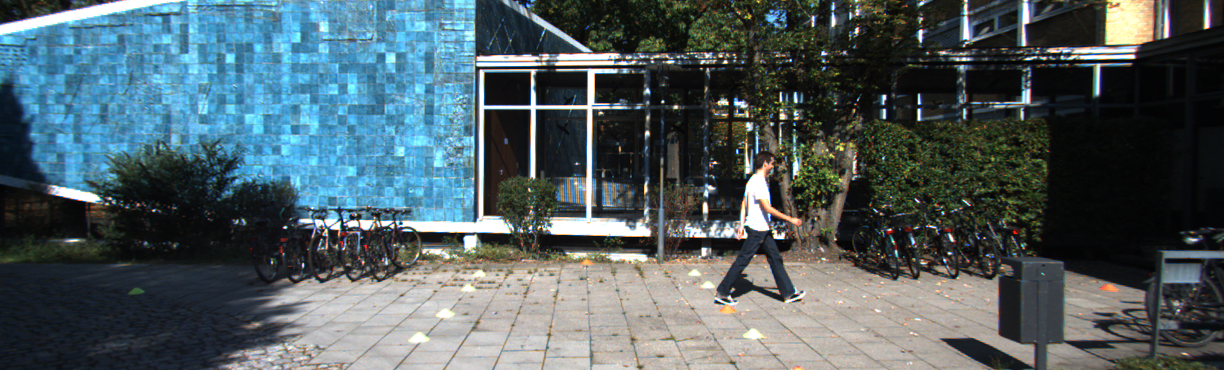

In [ ]:

#Use OpenCV or TensorFlow to detect pedestrians and vehicles
import cv2
import numpy as np
import os
from glob import glob
from google.colab.patches import cv2_imshow

# Paths to YOLO files
weights_path = "/content/yolov4-tiny.weights"
config_path = "/content/yolov4-tiny.cfg"
names_path = "/content/coco.names"

# Load YOLO model
net = cv2.dnn.readNet(weights_path, config_path)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Load class labels
with open(names_path, "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Get output layers
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

# Load KITTI dataset images
KITTI_IMAGE_DIR = "/content/kitti-mini/training/image_2"  # Adjust path as needed
image_files = sorted(glob(os.path.join(KITTI_IMAGE_DIR, "*.png")))

# Function to detect objects in an image
def detect_objects(image_path):
    img = cv2.imread(image_path)
    height, width = img.shape[:2]

    # Convert to blob
    blob = cv2.dnn.blobFromImage(img, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Forward pass
    outputs = net.forward(output_layers)

    detected_objects = set()

    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # Threshold
                detected_objects.add(classes[class_id])

    return img, detected_objects

#Process the first image
if image_files:
    image_path = image_files[0]
    img, detected_objects = detect_objects(image_path)

    # Display Results
    print(f"Objects Detected by Camera: {list(detected_objects)}")

    # Show image
    cv2_imshow(img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
else:
    print("No images found in the KITTI dataset.")


In [ ]:
#Comparing LIDAR vs. Camera-based object detection accuracy
import os

label_path = "/content/kitti-mini/training/label_2"  # Update path if needed
print("Label files:", os.listdir(label_path)[:5])  # Show first 5 label files


Label files: ['000012.txt', '000000.txt', '000016.txt', '000001.txt', '000008.txt']


In [ ]:
import os

files = ["/content/yolov4-tiny.weights", "/content//yolov4-tiny.cfg", "/content/coco.names"]
for file in files:
    if os.path.exists(file):
        print(f"✅ {file} exists")
    else:
        print(f"❌ {file} NOT FOUND!")


✅ /content/yolov4-tiny.weights exists
✅ /content//yolov4-tiny.cfg exists
✅ /content/coco.names exists


In [ ]:
#Comparing LIDAR vs. Camera-based object detection accuracy
import cv2
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
from glob import glob
!pip install ultralytics

# Load YOLOv5 Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Define KITTI Dataset Paths
KITTI_IMAGE_PATH = "/content/kitti-mini/training/image_2/"
KITTI_LIDAR_PATH = "/content/kitti-mini/testing/velodyne/"

# Load image files
image_files = sorted(glob(os.path.join(KITTI_IMAGE_PATH, "*.png")))

# Define Ground Truth Labels
ground_truth_objects = {"person", "bicycle", "car", "truck"}

# Function to Detect Objects Using YOLOv5
def detect_objects(image_path):
    img = cv2.imread(image_path)
    results = model(img)  # Run YOLO detection
    detected_objects = set(results.pandas().xyxy[0]['name'])  # Extract detected object names
    return img, detected_objects

# Function to Compute Detection Accuracy
def compute_accuracy(detected_objects, ground_truth):
    correct_detections = sum(1 for obj in detected_objects if obj in ground_truth)
    return (correct_detections / len(ground_truth)) * 100 if len(ground_truth) > 0 else 0

# Function to Process LIDAR Data
def process_lidar_data(lidar_file):
    lidar_data = np.fromfile(lidar_file, dtype=np.float32).reshape(-1, 4)  # Read LIDAR binary file
    return len(lidar_data)  # Return number of LIDAR points detected

# Process the First Image from KITTI Dataset
image_path = image_files[0]
img, detected_objects = detect_objects(image_path)

# Compute Camera-based Accuracy
camera_accuracy = compute_accuracy(detected_objects, ground_truth_objects)

# Process LIDAR Data
lidar_file = os.path.join(KITTI_LIDAR_PATH, os.path.basename(image_path).replace(".png", ".bin"))
lidar_detected_objects = process_lidar_data(lidar_file)

# Estimate LIDAR Accuracy (Assuming a threshold count)
expected_lidar_count = 125000 # Adjust based on dataset characteristics
lidar_accuracy = min((lidar_detected_objects / expected_lidar_count) * 100, 100) if expected_lidar_count > 0 else 0

# Display Results
print(f" Objects Detected by Camera: {list(detected_objects)}")
print(f" Camera-based Detection Accuracy: {camera_accuracy:.2f}%")
print(f"\n Objects Detected by LIDAR: {lidar_detected_objects}")
print(f" LIDAR-based Detection Accuracy: {lidar_accuracy:.2f}%")

# Visualization: Compare Camera vs LIDAR Accuracy
methods = ["Camera (YOLO)", "LIDAR"]
accuracy = [camera_accuracy, lidar_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(methods, accuracy, color=['blue', 'red'])
plt.ylabel("Detection Accuracy (%)")
plt.title("Comparison of Object Detection Accuracy")
plt.ylim(0, 100)
plt.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-4-27 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


 Objects Detected by Camera: ['bicycle', 'person']
 Camera-based Detection Accuracy: 50.00%

 Objects Detected by LIDAR: 125635
 LIDAR-based Detection Accuracy: 100.00%


In [ ]:
import os

LABELS_DIR = "/content/kitti-mini/training/label_2"  # Update path if needed

# List available label files
label_files = os.listdir(LABELS_DIR)
print("Total Label Files Found:", len(label_files))
print("First 5 Label Files:", label_files[:5])  # Show first few files


Total Label Files Found: 21
First 5 Label Files: ['000013.txt', '000000.txt', '000001.txt', '000009.txt', '000010.txt']


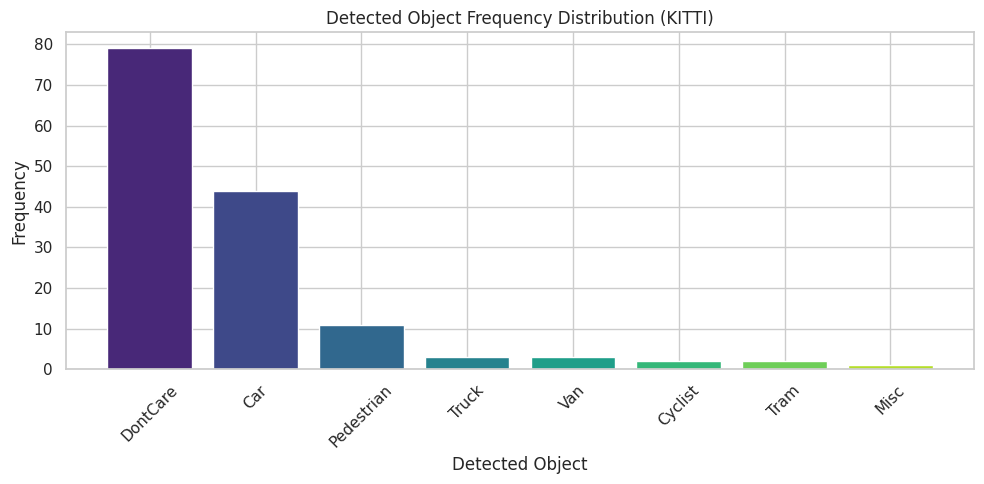

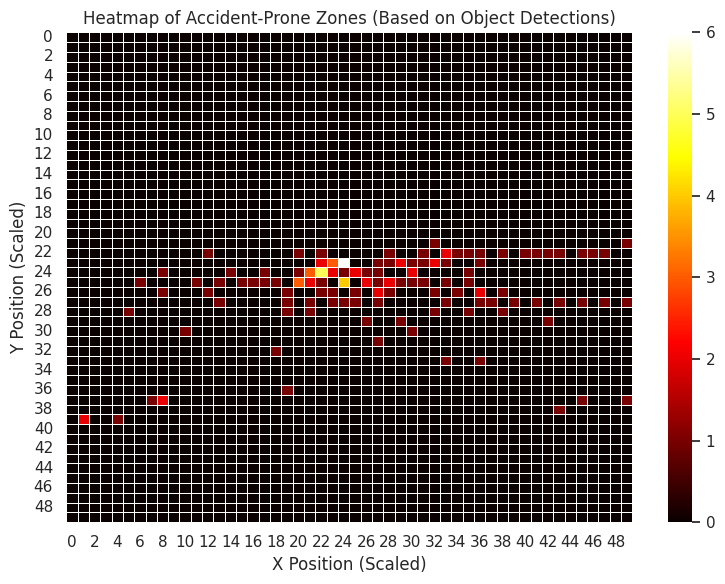

In [ ]:
#Data Visualization
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Set the path to your label_2 directory
LABELS_DIR = "/content/kitti-mini/training/label_2"

# Object Frequency Distribution
def get_object_frequencies(labels_dir):
    object_counts = {}
    if not os.path.exists(labels_dir):
        print("Error: LABELS_DIR does not exist.")
        return {}

    for filename in os.listdir(labels_dir):
        file_path = os.path.join(labels_dir, filename)
        with open(file_path, "r") as f:
            lines = f.readlines()
            for line in lines:
                parts = line.split()
                if len(parts) > 0:
                    obj_class = parts[0]
                    object_counts[obj_class] = object_counts.get(obj_class, 0) + 1

    return object_counts

# Get frequencies and convert to Pandas Series
object_frequencies = get_object_frequencies(LABELS_DIR)
obj_series = pd.Series(object_frequencies).sort_values(ascending=False)

# Plot object frequency distribution
plt.figure(figsize=(10, 5))
colors = sns.color_palette("viridis", len(obj_series))
plt.bar(obj_series.index, obj_series.values, color=colors)
plt.xlabel("Detected Object")
plt.ylabel("Frequency")
plt.title("Detected Object Frequency Distribution (KITTI)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

# Heatmap of Accident-Prone Zones
def generate_heatmap_data(labels_dir, grid_size=50):
    heatmap_grid = np.zeros((grid_size, grid_size))
    if not os.path.exists(labels_dir):
        print("Error: LABELS_DIR does not exist.")
        return heatmap_grid

    for filename in os.listdir(labels_dir):
        file_path = os.path.join(labels_dir, filename)
        with open(file_path, "r") as f:
            lines = f.readlines()
            for line in lines:
                parts = line.split()
                if len(parts) >= 8:
                    x1, y1, x2, y2 = map(float, parts[4:8])
                    x_center = (x1 + x2) / 2
                    y_center = (y1 + y2) / 2

                    x_idx = int((x_center / 1242) * grid_size)
                    y_idx = int((y_center / 375) * grid_size)

                    x_idx = max(0, min(grid_size - 1, x_idx))
                    y_idx = max(0, min(grid_size - 1, y_idx))

                    heatmap_grid[y_idx, x_idx] += 1
    return heatmap_grid

# Generate heatmap grid
heatmap_grid = generate_heatmap_data(LABELS_DIR)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_grid, cmap="hot", linewidths=0.5)
plt.title("Heatmap of Accident-Prone Zones (Based on Object Detections)")
plt.xlabel("X Position (Scaled)")
plt.ylabel("Y Position (Scaled)")
plt.tight_layout()
plt.show()
plt.close()
